In [4]:
# Import libraries
import pandas as pd
import numpy as np
import networkx as nx
import os
import matplotlib.pyplot as plt
from pyvis.network import Network
import seaborn as sns
import pyvis

# Relationships Analysis

In [5]:
# Import relationship data
edge_counts = pd.read_csv('edge_counts_updated.csv', index_col = 0)
edge_counts = edge_counts.reset_index()
edge_counts.head()

,source,target,weight
0,germany,united kingdom,33
1,russia,united states,27
2,germany,japan,27
3,france,united kingdom,24
4,germany,poland,23


In [6]:
# network object from the countries relationships dataframe
G = nx.from_pandas_edgelist(
    edge_counts, 
    source="source", 
    target="target", 
    edge_attr="weight", 
    create_using=nx.Graph()
)

# Relationship Visualization

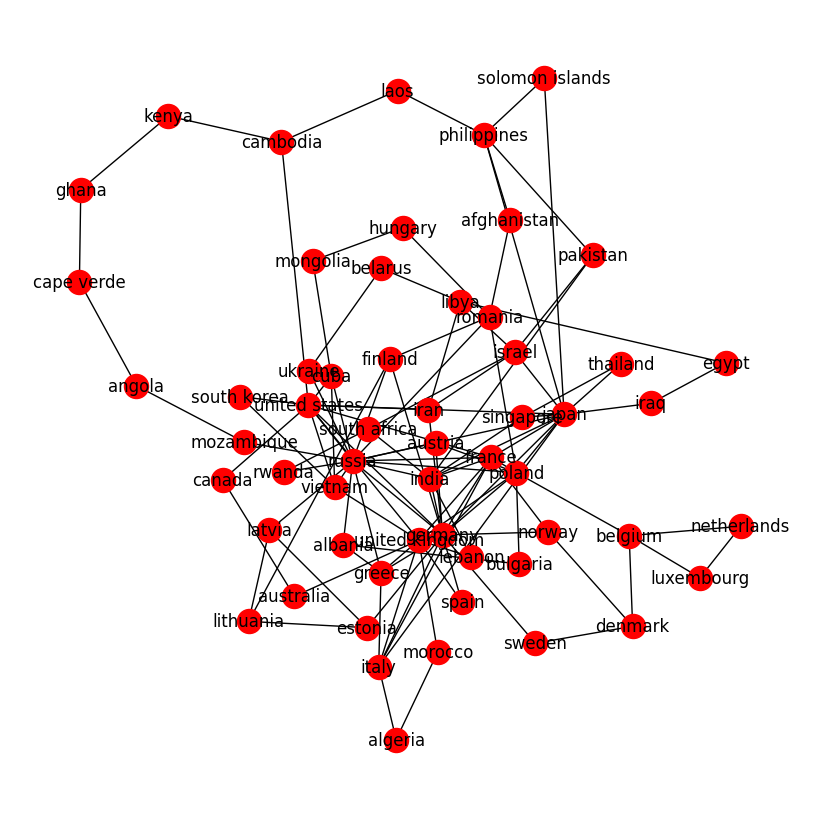

In [7]:
h = plt.figure(figsize = (8,8))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels = True, node_color = 'red', edge_cmap = plt.cm.Blues, pos = pos)
plt.show() 

# Visualization with Pyvis

In [8]:
# Define net object
net = Network()
net = Network(notebook = True,width="900px", height="800px", bgcolor='#222222', font_color='white')

# Define nodes from the G object
node_degree = dict(G.degree)

# Setting up node size attributes
nx.set_node_attributes(G, node_degree, 'size')
net.from_nx(G)
net.show_buttons(filter_ = True)
net.repulsion()
net.show("20th_century.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


# Community detection - Leiden algorithm

In [9]:
from cdlib import algorithms
coms = algorithms.leiden(G)

Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'bayanpy', 'wurlitzer', 'graph_tool'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'ASLPAw', 'pyclustering'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'wurlitzer'}


In [10]:
new_com = coms.to_node_community_map()
new_com

defaultdict(list,
            {'germany': [0],
             'united kingdom': [0],
             'france': [0],
             'italy': [0],
             'greece': [0],
             'denmark': [0],
             'norway': [0],
             'sweden': [0],
             'algeria': [0],
             'morocco': [0],
             'spain': [0],
             'russia': [1],
             'poland': [1],
             'albania': [1],
             'romania': [1],
             'estonia': [1],
             'latvia': [1],
             'austria': [1],
             'finland': [1],
             'lithuania': [1],
             'bulgaria': [1],
             'egypt': [2],
             'libya': [2],
             'israel': [2],
             'south africa': [2],
             'belarus': [2],
             'ukraine': [2],
             'iran': [2],
             'rwanda': [2],
             'iraq': [2],
             'japan': [3],
             'india': [3],
             'pakistan': [3],
             'solomon islands': [3],

In [11]:
# Put the output from new_com into a dictionary
dict_com = {k:v[0] for k, v in new_com.items()}

In [12]:
# Rerun network graph with the communities as an argument
nx.set_node_attributes(G, dict_com, 'group')
com_net = Network(notebook = True, width="1300px", height="700px", bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show_buttons(filter_ = True)
com_net.repulsion()
com_net.show("20th_century_syndicate.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


**Remarks**: The graph shows the relationships between countries in the 20th century, the communities formed during this period, and the most influential countries within each community. As we can see, some of the most influential countries were Russia, Germany, Japan, the United Kingdom, France, and the United States. This aligns with major historical events such as the First and Second World Wars, the Russian Revolution, the Cold War, and the formation of the USSR.

The graph highlights a community of countries led by Russia during the USSR period. It also shows how Germany established strong connections with various European countries. The community led by the UK and France reflects their colonial past. Japan led the group in East Asia, while the United States—due to its involvement in conflicts with Cuba, Vietnam, Cambodia, and others—formed a distinct community in the graph.

# Degree, Closeness, and Betweenness Centrality in 20th Century

In [13]:
# Degree centrality
degree_dict = nx.degree_centrality(G)
degree_dict

{'germany': 0.2857142857142857,
 'united kingdom': 0.19642857142857142,
 'russia': 0.30357142857142855,
 'united states': 0.19642857142857142,
 'japan': 0.23214285714285712,
 'france': 0.1607142857142857,
 'poland': 0.1607142857142857,
 'italy': 0.10714285714285714,
 'india': 0.14285714285714285,
 'pakistan': 0.05357142857142857,
 'solomon islands': 0.03571428571428571,
 'philippines': 0.08928571428571427,
 'egypt': 0.03571428571428571,
 'libya': 0.07142857142857142,
 'albania': 0.05357142857142857,
 'greece': 0.08928571428571427,
 'romania': 0.08928571428571427,
 'israel': 0.08928571428571427,
 'south africa': 0.05357142857142857,
 'denmark': 0.05357142857142857,
 'norway': 0.05357142857142857,
 'estonia': 0.05357142857142857,
 'latvia': 0.05357142857142857,
 'austria': 0.05357142857142857,
 'cambodia': 0.05357142857142857,
 'finland': 0.07142857142857142,
 'lithuania': 0.05357142857142857,
 'vietnam': 0.08928571428571427,
 'belarus': 0.03571428571428571,
 'ukraine': 0.035714285714285

In [14]:
degree_df = pd.DataFrame(degree_dict.items(), columns=['Countries','Centrality'])

In [15]:
degree_df.sort_values(by = ['Centrality'], ascending=False, inplace = True)

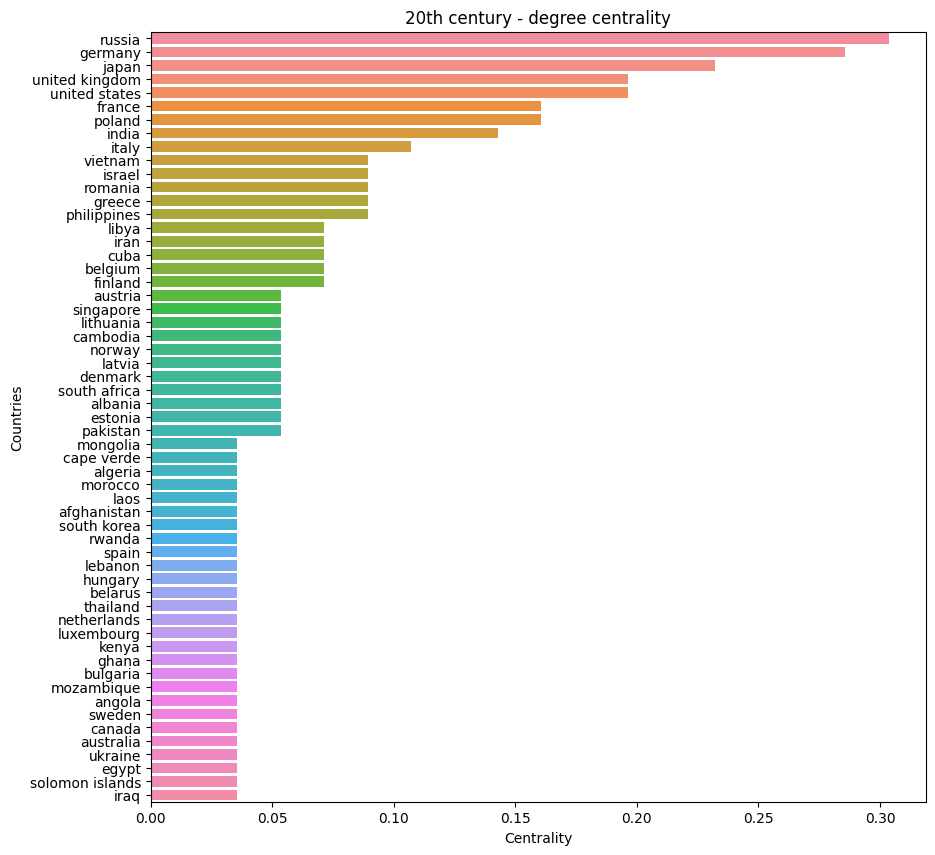

In [16]:
# Plot the degree centrality
plt.figure(figsize = (10, 10))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "Centrality", y = "Countries",
    saturation = 0.9, data = degree_df).set_title("20th century - degree centrality")

**Remarks**: The Degree Centrality bar chart highlights the top five most connected countries—Russia, Germany, Japan, the UK, and the US—reflecting their strong geopolitical influence throughout the 20th century.

In [17]:
# Closeness centrality
closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame(closeness_dict.items(), columns=['Countries','Centrality'])
closeness_df.sort_values(by = ['Centrality'], ascending=False, inplace = True)

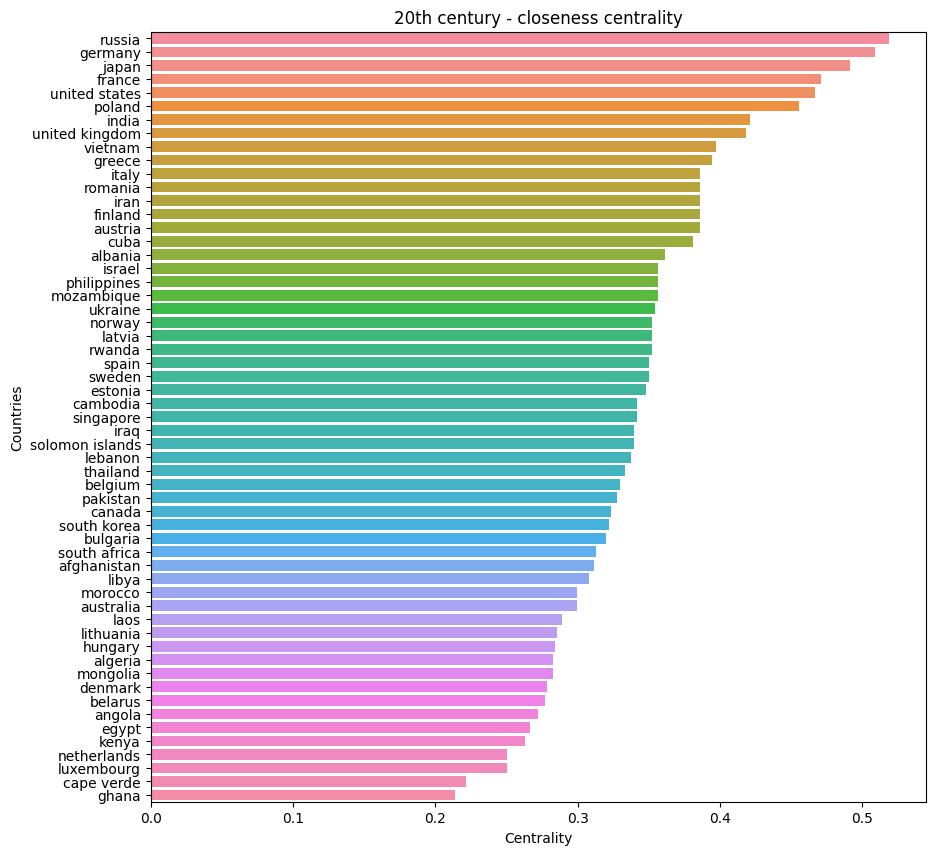

In [18]:
# Plot the closeness centrality
plt.figure(figsize = (10, 10))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "Centrality", y = "Countries",
    saturation = 0.9, data = closeness_df).set_title("20th century - closeness centrality")

**Remarks**: The Closeness Centrality bar chart shows that France has replaced the UK among the top five most important countries. However, the overall change across the rankings is gradual, indicating that most countries remain closely connected to the global powerhouses in one way or another.

In [19]:
# Betweenness centrality
betweenness_dict = nx.betweenness_centrality(G)
betweennes_df = pd.DataFrame(betweenness_dict.items(), columns=['Countries','Centrality'])
betweennes_df.sort_values(by = ['Centrality'], ascending=False, inplace = True)

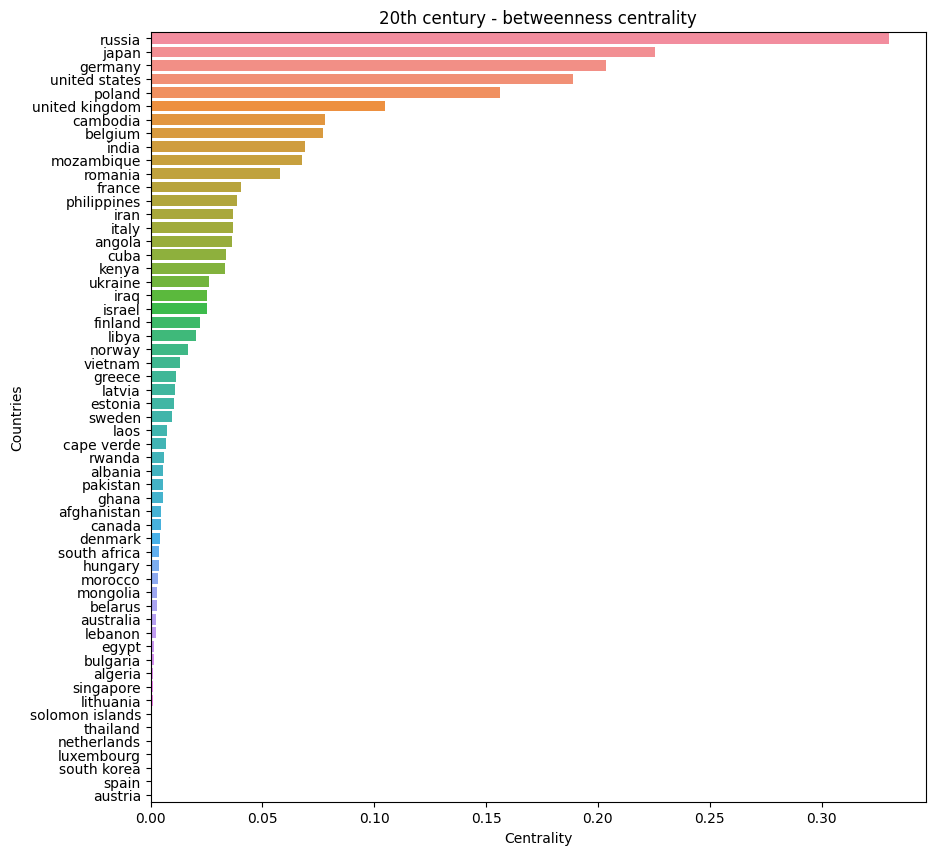

In [20]:
# Plot the Betweenness centrality
plt.figure(figsize = (10, 10))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "Centrality", y = "Countries",
    saturation = 0.9, data = betweennes_df).set_title("20th century - betweenness centrality")

**Remarks**: Betweenness Centrality measures a country’s level of control in the network—specifically, how often other countries 'depend' on it as a bridge along the shortest paths. In this metric, the rankings shift notably: Poland enters the top five, and the US moves up to fourth place. Meanwhile, the UK and France lose their central positions, and Cambodia emerges as one of the influential countries of the 20th century. Although many major events occurred in Europe, several European countries performed poorly in terms of global influence during this period.

In [21]:
# Save centrality measures
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')